# Tugas Individu - Rekayasa Fitur
10122099<br>
Muhammad Raffy Abdillah<br>
IF-3<br>
Rekayasa Fitur Data Video<br>


Tahap 1: Import Pustaka dan Video

In [112]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
video = 'Kereta.mp4'

Tahap 2: Menampilkan Video

In [114]:
file_vid = cv2.VideoCapture(video)

while True:
    berhasil, bingkai = file_vid.read()
    if not berhasil:
        break
    cv2.imshow('Video Asli', bingkai)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

file_vid.release()
cv2.destroyAllWindows()

Tahap 3: Praproses (Resize & Grayscale)

In [115]:
file_vid = cv2.VideoCapture(video)

fps = file_vid.get(cv2.CAP_PROP_FPS)
print(f"FPS Video: {fps}")
berhasil, bingkai = file_vid.read()
tinggi, lebar = bingkai.shape[:2]

skala = 50
lebar_vid = int(lebar * skala / 100)
tinggi_vid = int(tinggi * skala / 100)

delay = int (500 / fps)

while True:
    berhasil, bingkai = file_vid.read()
    if not berhasil:
        file_vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
        continue
    ukuran = cv2.resize(bingkai, (lebar_vid, tinggi_vid))

    vid_abu = cv2.cvtColor(ukuran, cv2.COLOR_BGR2GRAY)

    cv2.imshow('Video Berubah Ukuran & Grayscale', vid_abu)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

file_vid.release()
cv2.destroyAllWindows()

FPS Video: 30.181098386723857


Tahap 4a: Ekstraksi Fitur (Canny)

In [ ]:
file_vid = cv2.VideoCapture(video)

fps = file_vid.get(cv2.CAP_PROP_FPS)
berhasil, bingkai = file_vid.read()
tinggi, lebar = bingkai.shape[:2]

skala = 50
lebar_vid = int(lebar * skala / 100)
tinggi_vid = int(tinggi * skala / 100)

edge_counts = []

while True:
    berhasil, bingkai = file_vid.read()
    if not berhasil:
        break

    ukuran = cv2.resize(bingkai, (lebar_vid, tinggi_vid))

    abu_abu = cv2.cvtColor(ukuran, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(abu_abu, 200, 100)

    edge_count = np.sum(edges > 0)
    edge_counts.append(edge_count)

    cv2.imshow('Canny Edge', edges)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

file_vid.release()
cv2.destroyAllWindows()

df = pd.DataFrame({'Jumlah Tepi Piksel': edge_counts})
df.to_csv('canny_features.csv', index=False)
print("Fitur Canny disimpan ke 'canny_features.csv'")

Fitur Canny disimpan ke 'canny_features.csv'


Tahap 4b: Ekstraksi Fitur (Motion History Image)

In [ ]:
file_vid = cv2.VideoCapture(video)

berhasil, bingkai = file_vid.read()
tinggi, lebar = bingkai.shape[:2]

skala = 50
lebar_vid = int(lebar * skala / 100)
tinggi_vid = int(tinggi * skala / 100)

durasi = 0.2

fitur_mhi = []

if berhasil:
    bingkai_abu_lama = cv2.cvtColor(bingkai, cv2.COLOR_BGR2GRAY)
else:
    print("Gagal membaca video")
    file_vid.release()
    exit()

mhi = np.zeros((tinggi, lebar), dtype=np.float64)

while True:
    berhasil, bingkai = file_vid.read()
    if not berhasil:
        break 

    bingkai_abu_baru = cv2.cvtColor(bingkai, cv2.COLOR_BGR2GRAY)
    diff_bingkai = cv2.absdiff(bingkai_abu_baru, bingkai_abu_lama)
    bingkai_abu_lama = bingkai_abu_baru.copy()

    mhi = np.maximum(mhi - durasi, diff_bingkai)

    mean_val = np.mean(mhi)
    std_val = np.std(mhi)
    sum_val = np.sum(mhi)
    fitur_mhi.append([mean_val, std_val, sum_val])

    ukuran = cv2.resize(bingkai, (lebar_vid, tinggi_vid))
    mhi_ukuran = cv2.resize(mhi, (lebar_vid, tinggi_vid))
    mhi_ukuran = mhi_ukuran.astype(np.uint8)

    gabung = np.hstack((ukuran, cv2.cvtColor(mhi_ukuran, cv2.COLOR_GRAY2BGR)))
    cv2.imshow('Video Asli dan MHI (50%)', gabung)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break

file_vid.release()
cv2.destroyAllWindows()

df = pd.DataFrame(fitur_mhi, columns=['Mean', 'Std', 'Sum'])
df.to_csv('mhi_features.csv', index=False)
print('Fitur MHI per frame berhasil disimpan ke mhi_features.csv.')

Fitur MHI per frame berhasil disimpan ke mhi_features.csv.


Tahap 5: Hasil Visual

Plot Canny

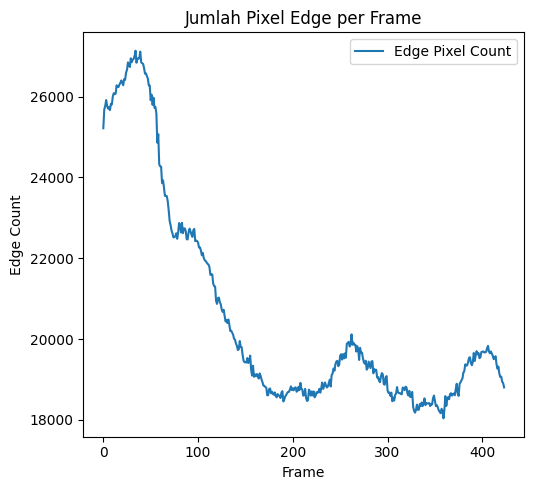

In [122]:
df = pd.read_csv('canny_features.csv')
frames = range(len(df))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(frames, edge_counts, label='Edge Pixel Count')
plt.xlabel('Frame')
plt.ylabel('Edge Count')
plt.title('Jumlah Pixel Edge per Frame')
plt.legend()

plt.tight_layout()
plt.show()


Motion History Image

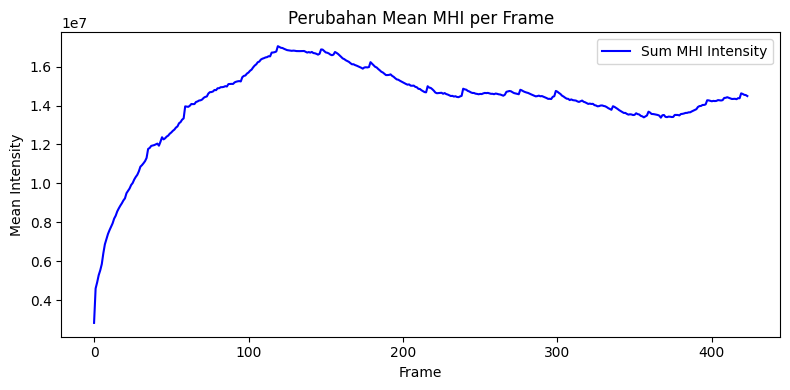

In [123]:
df = pd.read_csv('mhi_features.csv')
frames = range(len(df))

plt.figure(figsize=(8,4))
plt.plot(frames, df['Sum'], label='Sum MHI Intensity', color='blue')
plt.xlabel('Frame')
plt.ylabel('Mean Intensity')
plt.title('Perubahan Mean MHI per Frame')
plt.legend()

plt.tight_layout()
plt.show()

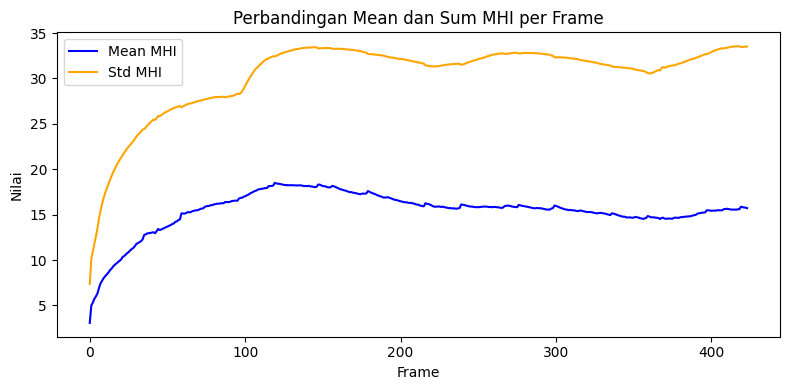

In [124]:
plt.figure(figsize=(8,4))
plt.plot(frames, df['Mean'], label='Mean MHI', color='blue')
plt.plot(frames, df['Std'], label='Std MHI', color='orange')
plt.xlabel('Frame')
plt.ylabel('Nilai')
plt.title('Perbandingan Mean dan Sum MHI per Frame')
plt.legend()
plt.tight_layout()
plt.show()
